In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('Location1.csv')
print("데이터 미리보기: ")
print(df.head())

데이터 미리보기: 
                  Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  
0            1.4  0.1635  
1            4.4  0.1424  


In [41]:
print("\n데이터 정보 요약:")
df.info()


데이터 정보 요약:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


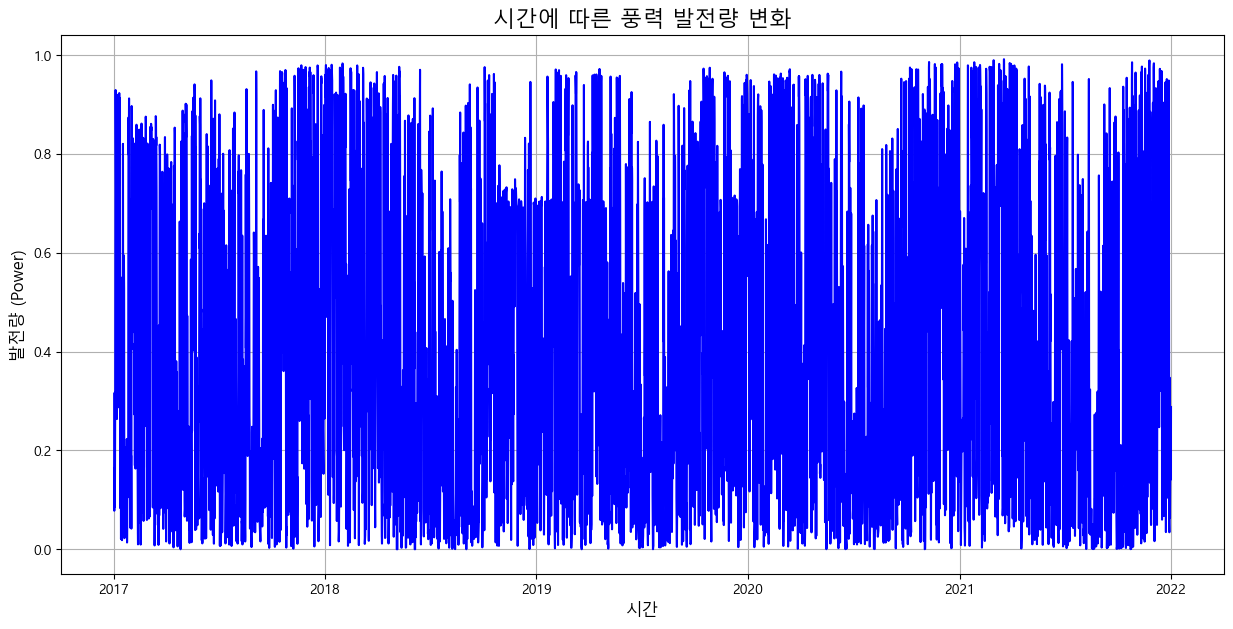

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Power'], linestyle='-', color='b')
plt.title('시간에 따른 풍력 발전량 변화', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전량 (Power)', fontsize=12)
plt.grid(True)
plt.show()

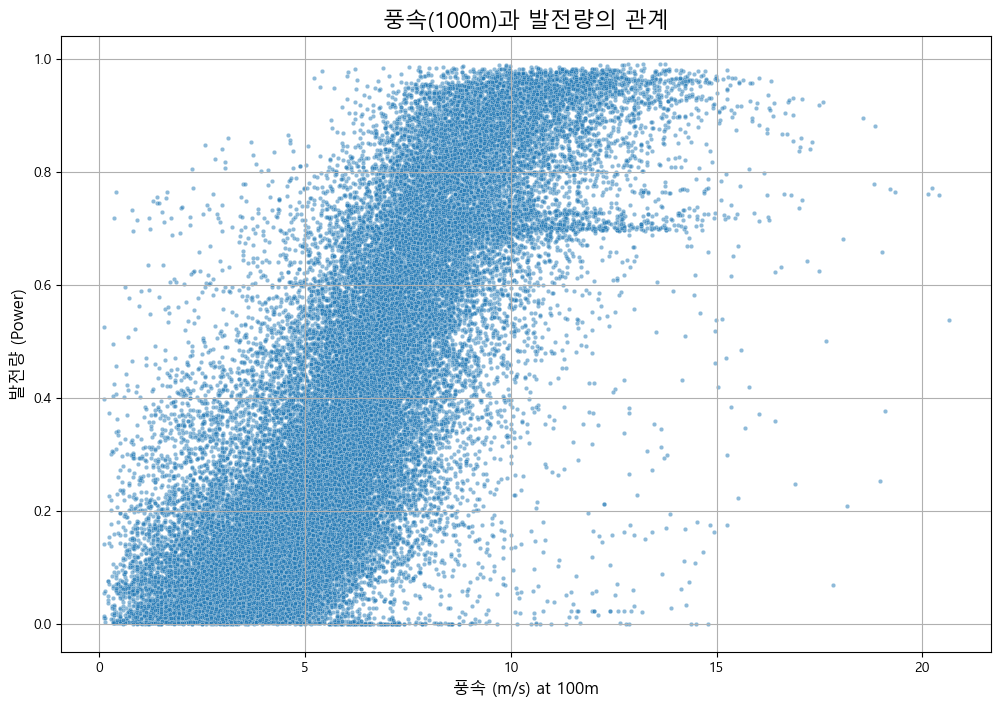

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='windspeed_100m', y='Power', data=df, alpha=0.5, s=10)
plt.title('풍속(100m)과 발전량의 관계', fontsize=16)
plt.xlabel('풍속 (m/s) at 100m', fontsize=12)
plt.ylabel('발전량 (Power)', fontsize=12)
plt.grid(True)
plt.show()

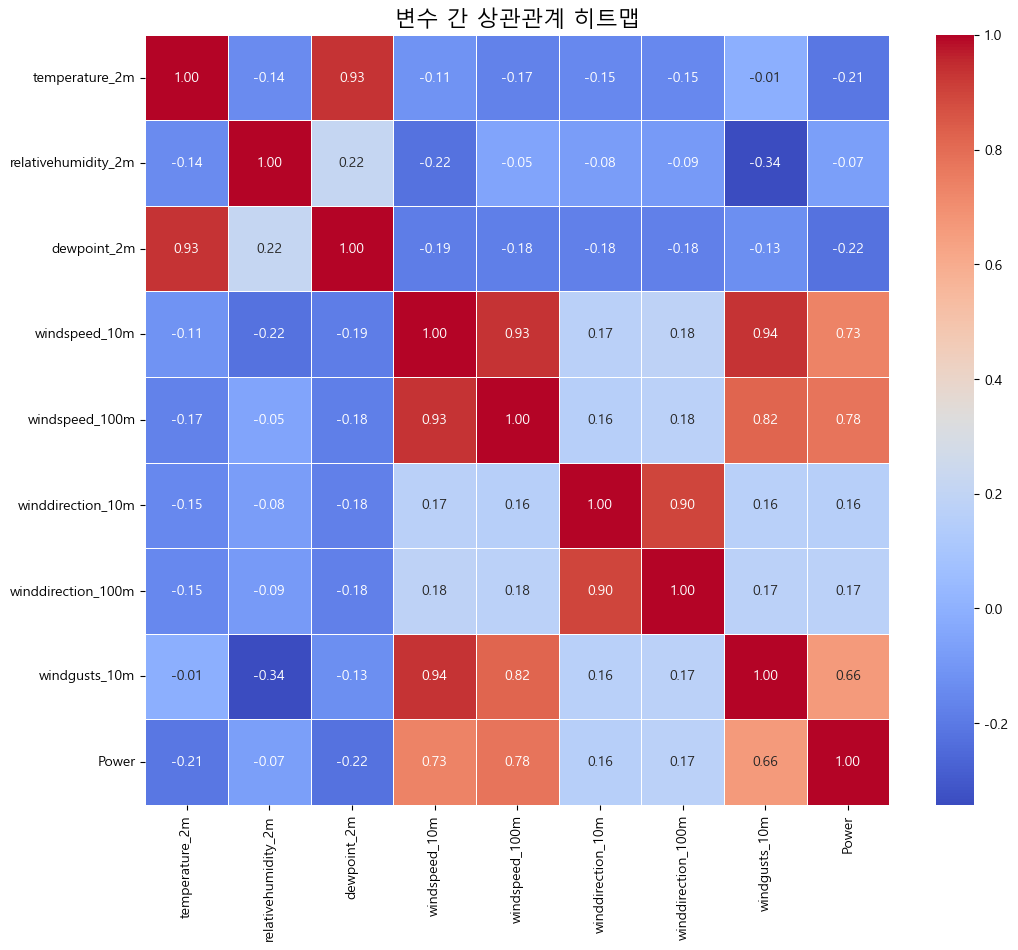

In [44]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('변수 간 상관관계 히트맵', fontsize=16)
plt.show()

C:\Users\limjeasung\AppData\Local\Temp\ipykernel_148548\1819896607.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_power_by_direction = df.groupby('wind_direction_bin')['Power'].mean().sort_index()


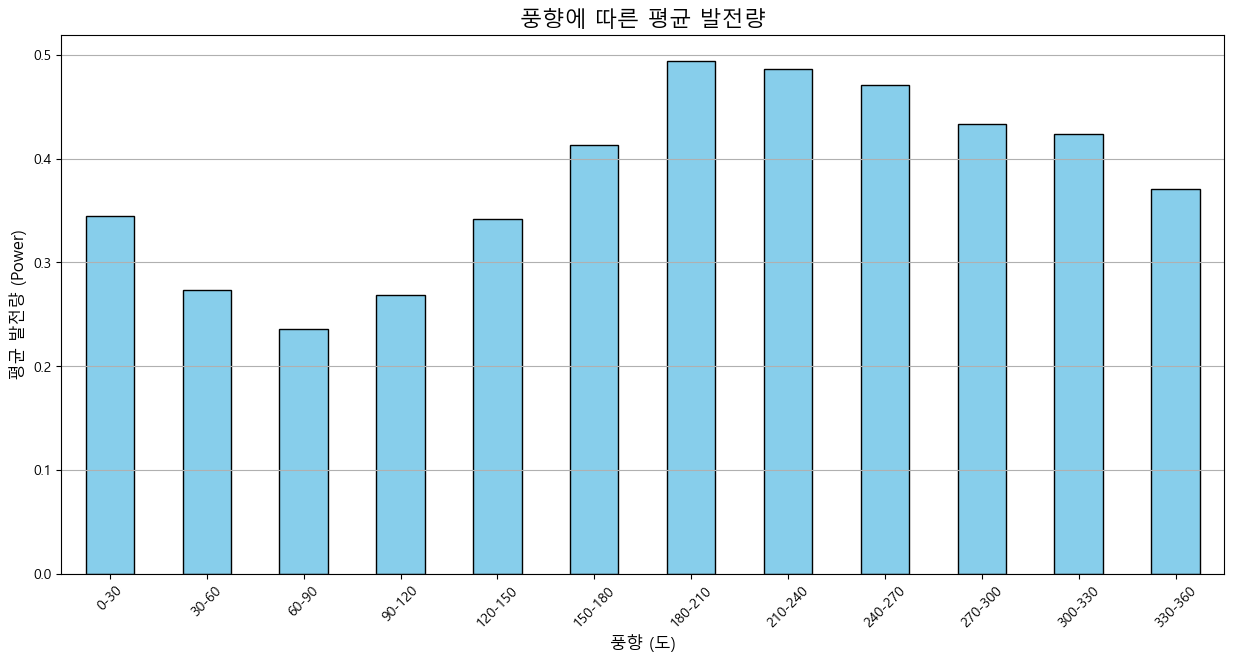

In [45]:

df['wind_direction_bin'] = pd.cut(df['winddirection_100m'], bins=12, labels=[f'{i*30}-{ (i+1)*30 }' for i in range(12)])

mean_power_by_direction = df.groupby('wind_direction_bin')['Power'].mean().sort_index()

plt.figure(figsize=(15, 7))
mean_power_by_direction.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('풍향에 따른 평균 발전량', fontsize=16)
plt.xlabel('풍향 (도)', fontsize=12)
plt.ylabel('평균 발전량 (Power)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\limjeasung\AppData\Local\Temp\ipykernel_148548\544641818.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_curve_stats = df.groupby('wind_speed_bin')['Power'].agg(['mean', 'std']).reset_index()


풍속 구간별 평균 및 표준편차:
  wind_speed_bin      mean       std
0        0.0-0.5  0.142444  0.165579
1        0.5-1.0  0.116754  0.124191
2        1.0-1.5  0.117032  0.126826
3        1.5-2.0  0.124689  0.131561
4        2.0-2.5  0.131863  0.125043


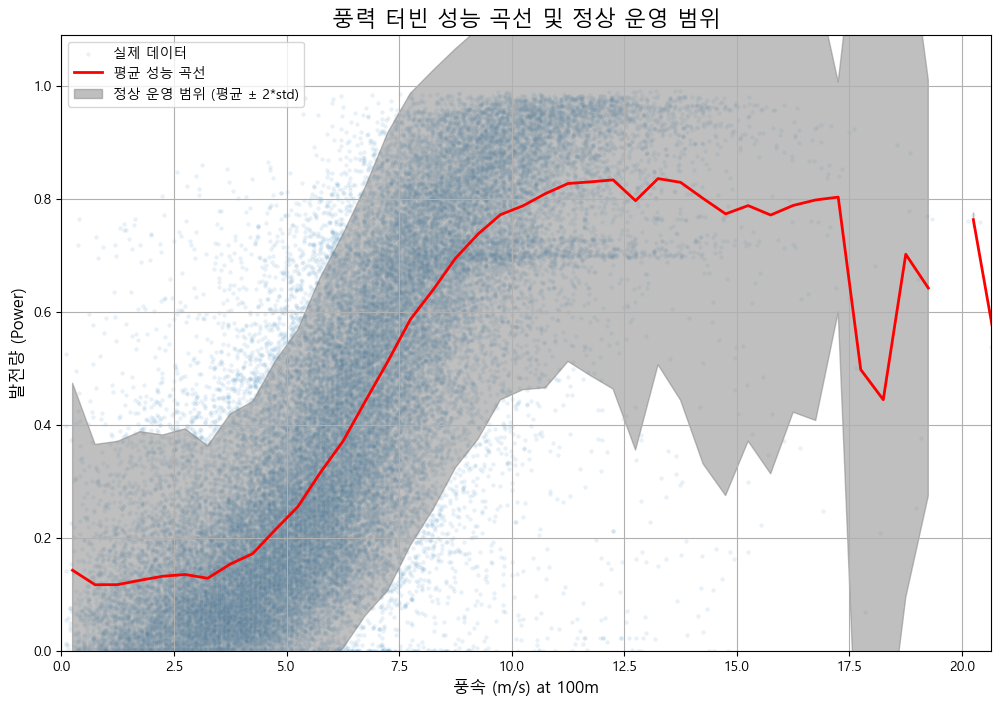

In [46]:
import numpy as np

max_wind_speed = df['windspeed_100m'].max()
bins = np.arange(0, max_wind_speed + 0.5, 0.5)
labels = [f'{i}-{i+0.5}' for i in bins[:-1]]
df['wind_speed_bin'] = pd.cut(df['windspeed_100m'], bins=bins, labels=labels, right=False)
power_curve_stats = df.groupby('wind_speed_bin')['Power'].agg(['mean', 'std']).reset_index()

print("풍속 구간별 평균 및 표준편차:")
print(power_curve_stats.head())

power_curve_stats['wind_speed_center'] = bins[:-1] + 0.25

plt.figure(figsize=(12, 8))

sns.scatterplot(x='windspeed_100m', y='Power', data=df, alpha=0.1, s=10, label='실제 데이터')

plt.plot(power_curve_stats['wind_speed_center'], power_curve_stats['mean'], color='red', linewidth=2, label='평균 성능 곡선')

plt.fill_between(power_curve_stats['wind_speed_center'],
                 power_curve_stats['mean'] - 2 * power_curve_stats['std'],
                 power_curve_stats['mean'] + 2 * power_curve_stats['std'],
                 color='gray', alpha=0.5, label='정상 운영 범위 (평균 ± 2*std)')


plt.title('풍력 터빈 성능 곡선 및 정상 운영 범위', fontsize=16)
plt.xlabel('풍속 (m/s) at 100m', fontsize=12)
plt.ylabel('발전량 (Power)', fontsize=12)
plt.legend()
plt.grid(True)
plt.ylim(0, df['Power'].max() * 1.1)
plt.xlim(0, max_wind_speed)
plt.show()

터빈 가동 풍속(3.5 m/s 초과) 데이터 중, 비효율 상태로 식별된 데이터의 비율: 1.98%


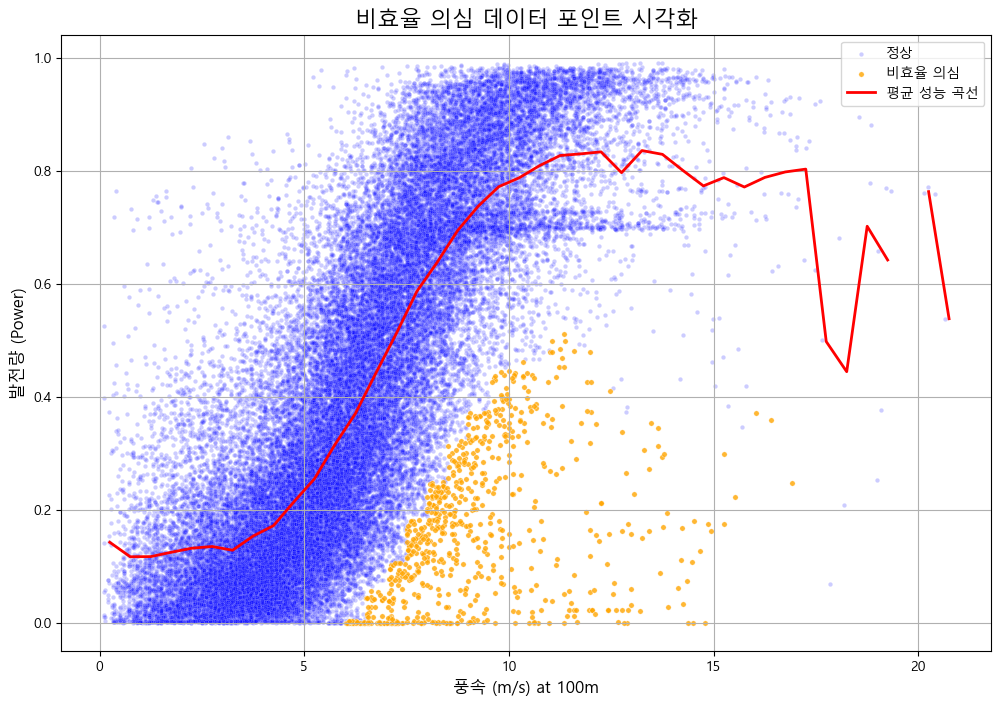

In [47]:

df = df.merge(power_curve_stats, on='wind_speed_bin', how='left')

df['inefficiency_threshold'] = df['mean'] - 2 * df['std']
cut_in_speed = 3.5
df['status'] = 'Normal'
df.loc[(df['Power'] < df['inefficiency_threshold']) & (df['windspeed_100m'] > cut_in_speed), 'status'] = 'Inefficient'

inefficient_percentage = (df['status'] == 'Inefficient').sum() / len(df[df['windspeed_100m'] > cut_in_speed]) * 100

print(f"터빈 가동 풍속({cut_in_speed} m/s 초과) 데이터 중, 비효율 상태로 식별된 데이터의 비율: {inefficient_percentage:.2f}%")

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='windspeed_100m',
    y='Power',
    data=df[df['status'] == 'Normal'],
    alpha=0.2,
    s=10,
    color='blue',
    label='정상'
)
sns.scatterplot(
    x='windspeed_100m',
    y='Power',
    data=df[df['status'] == 'Inefficient'],
    alpha=0.8,
    s=15,
    color='orange',
    label='비효율 의심'
)

plt.plot(power_curve_stats['wind_speed_center'], power_curve_stats['mean'], color='red', linewidth=2, label='평균 성능 곡선')


plt.title('비효율 의심 데이터 포인트 시각화', fontsize=16)
plt.xlabel('풍속 (m/s) at 100m', fontsize=12)
plt.ylabel('발전량 (Power)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ['windspeed_100m', 'winddirection_100m', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m']
target = 'Power'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("훈련 데이터 (Features):", X_train.shape)
print("테스트 데이터 (Features):", X_test.shape)
print("훈련 데이터 (Target):", y_train.shape)
print("테스트 데이터 (Target):", y_test.shape)

훈련 데이터 (Features): (35040, 5)
테스트 데이터 (Features): (8760, 5)
훈련 데이터 (Target): (35040,)
테스트 데이터 (Target): (8760,)


In [49]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("랜덤 포레스트 모델 훈련을 시작합니다... (다소 시간이 걸릴 수 있습니다)")
rf_model.fit(X_train, y_train)
print("모델 훈련이 완료되었습니다.")

print("테스트 데이터로 예측을 수행합니다...")
y_pred = rf_model.predict(X_test)
print("예측이 완료되었습니다.")

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- 모델 성능 평가 결과 ---")
print(f"평균 절대 오차 (MAE): {mae:.4f}")
print(f"R-제곱 (R-squared): {r2:.4f}")

랜덤 포레스트 모델 훈련을 시작합니다... (다소 시간이 걸릴 수 있습니다)
모델 훈련이 완료되었습니다.
테스트 데이터로 예측을 수행합니다...
예측이 완료되었습니다.

--- 모델 성능 평가 결과 ---
평균 절대 오차 (MAE): 0.1192
R-제곱 (R-squared): 0.6960


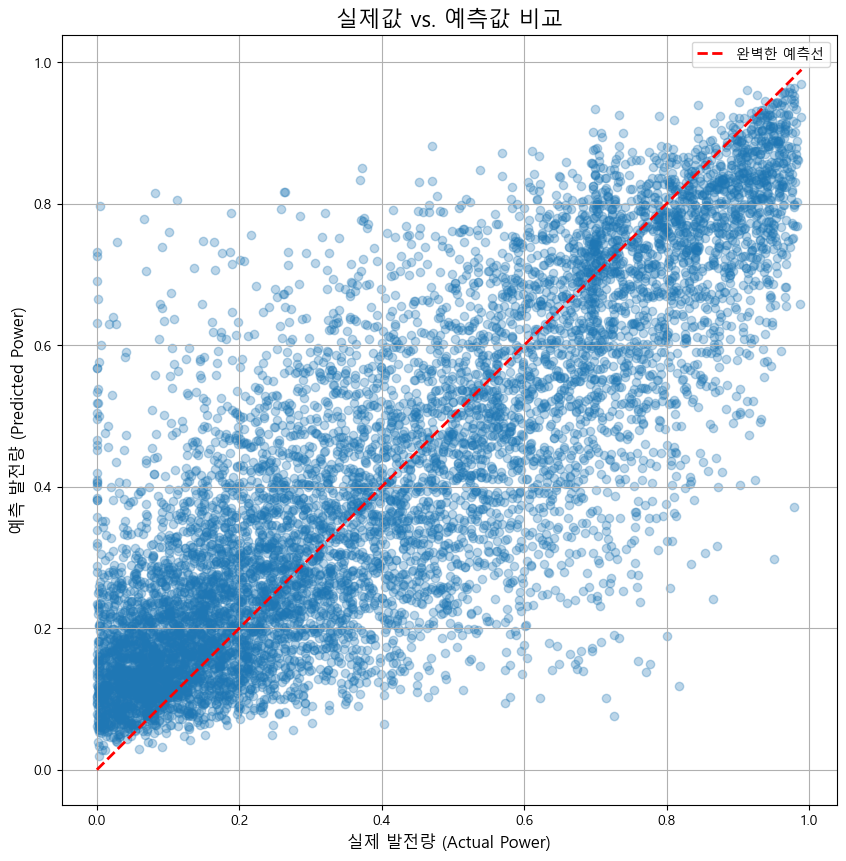

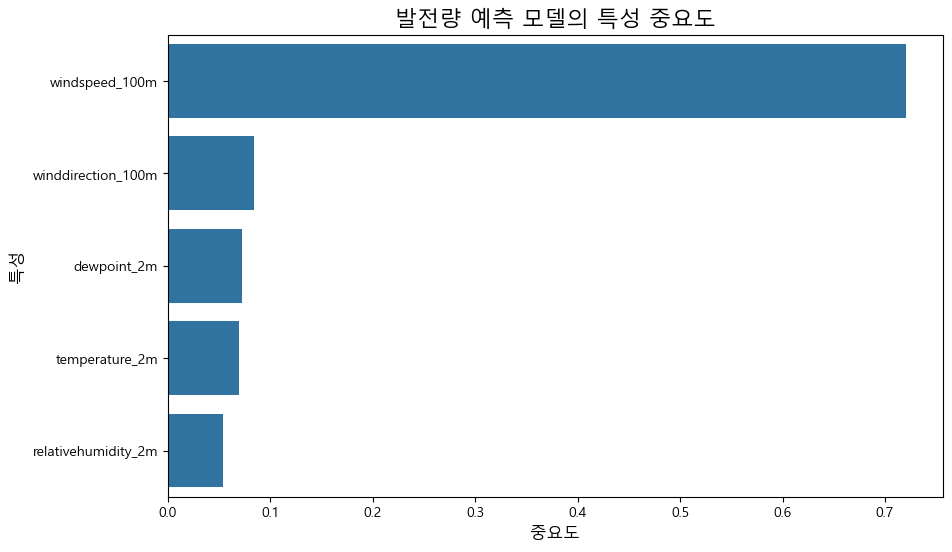

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='완벽한 예측선')
plt.xlabel('실제 발전량 (Actual Power)', fontsize=12)
plt.ylabel('예측 발전량 (Predicted Power)', fontsize=12)
plt.title('실제값 vs. 예측값 비교', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('발전량 예측 모델의 특성 중요도', fontsize=16)
plt.xlabel('중요도', fontsize=12)
plt.ylabel('특성', fontsize=12)
plt.show()

In [ ]:
import time
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'SVR': Pipeline([('scaler', StandardScaler()), ('model', SVR())]),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
}

results_list = []

for name, model in models.items():
    print(f"--- {name} 모델 학습 및 평가 시작 ---")
    
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    results_list.append({
        'Model': name,
        'MAE': mae,
        'R-squared': r2,
        'Training Time (s)': training_time
    })
    
    print(f"{name} 완료. (소요 시간: {training_time:.2f}초)")

results_df = pd.DataFrame(results_list).sort_values(by='R-squared', ascending=False)

print("\n--- 최종 모델 비교 평가 결과 ---")
print(results_df.to_string(index=False))

--- Linear Regression 모델 학습 및 평가 시작 ---
Linear Regression 완료. (소요 시간: 0.01초)
--- SVR 모델 학습 및 평가 시작 ---
